<a href="https://colab.research.google.com/github/ashis003/Machine-Learning/blob/main/DBSCAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

|     |   age |    bmi |
|----:|------:|-------:|
|   0 |    19 | 27.9   |
|   1 |    18 | 33.77  |
|   2 |    28 | 33     |
|   3 |    33 | 22.705 |
|   4 |    32 | 28.88  |
|   5 |    31 | 25.74  |
|   6 |    46 | 33.44  |
|   7 |    37 | 27.74  |
|   8 |    37 | 29.83  |
|   9 |    60 | 25.84  |
|  10 |    25 | 26.22  |
|  11 |    62 | 26.29  |
|  12 |    23 | 34.4   |
|  13 |    56 | 39.82  |
|  14 |    27 | 42.13  |
|  15 |    19 | 24.6   |
|  16 |    52 | 30.78  |
|  17 |    23 | 23.845 |
|  18 |    56 | 40.3   |
|  19 |    30 | 35.3   |
|  20 |    60 | 36.005 |
|  21 |    30 | 32.4   |
|  22 |    18 | 34.1   |
|  23 |    34 | 31.92  |
|  24 |    37 | 28.025 |
|  25 |    59 | 27.72  |
|  26 |    63 | 23.085 |
|  27 |    55 | 32.775 |
|  28 |    23 | 17.385 |
|  29 |    31 | 36.3   |
|  30 |    22 | 35.6   |
|  31 |    18 | 26.315 |
|  32 |    19 | 28.6   |
|  33 |    63 | 28.31  |
|  34 |    28 | 36.4   |
|  35 |    19 | 20.425 |
|  36 |    62 | 32.965 |
|  37 |    26 | 20.8   |


<ipython-input-7-7783f5b5b241>:27: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X[mask, 0], X[mask, 1], c=color)


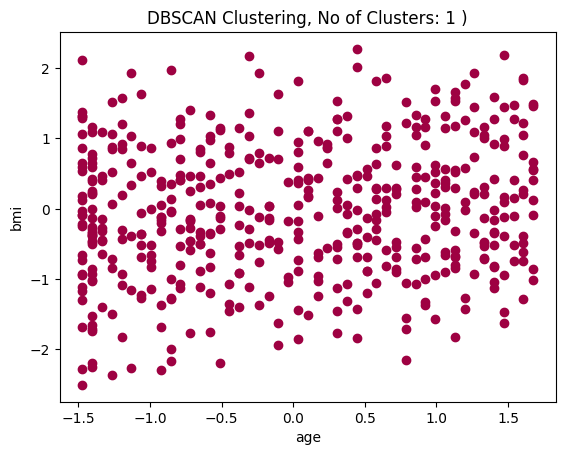

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('insurance (1).csv')
data = data.iloc[0:500, [0, 2]]
print(data.to_markdown())
X = data.values

# standardize the data
X = StandardScaler().fit_transform(X)


# DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X)

# plot the results
labels = dbscan.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
colors = plt.cm.Spectral(np.linspace(0, 1, n_clusters))

for cluster, color in zip(range(n_clusters), colors):
    mask = (labels == cluster)
    plt.scatter(X[mask, 0], X[mask, 1], c=color)

# plt.title(f"DBSCAN Clustering (n_clusters={n_clusters})")
plt.xlabel("age")
plt.ylabel("bmi")
info = f"DBSCAN Clustering, No of Clusters: {n_clusters} )"
plt.title(info)
plt.show()